# Run Opportunities Created-  A new baseball statistic
***
This is a Sabermetrics final project by Meredith Burgess

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import ipywidgets as widgets
from ipywidgets import *
from IPython.display import display, HTML
%matplotlib inline

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as tk
import operator
#import ipywidgets as widgets
#from ipywidgets import interact, interactive, fixed, interact_manual
#from IPython.display import display
%matplotlib inline

In [4]:
#lists and dictionaries 
listOfEvents = ["Out", "K", "SB", "DI", "CS", "PK", "WP", "PB", "BK", "OA", "FE", "NIBB", "IBB", "HBP", "XI",
"ROE", "FC", "1B", "2B", "3B", "HR" ]
listOfEventsLong = ["Generic Out", "Strikeout", "Stolen Base", "Defensive Indifference", "Caught Stealing", "Pickoff", "Wild Pitch", "Passed Ball",
"Balk", "Other Advance", "Foul Error", "Nonintentional Walk", "Intentional Walk", "Hit By Pitch", "Interference", "Error", "Fielder Choice",
"Single", "Double", "Triple", "Homerun"]
eventCodes = [2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
eventCodesDict = {"Out":2, "K":3, "SB":4, "DI":5, "CS":6, "PK":8, "WP":9, "PB":10, "BK":11, "OA":12, 
"FE":13, "NIBB":14, "IBB":15, "HBP":16, "XI":17,"ROE":18, "FC":19, "1B":20, "2B":21, "3B":22, "HR":23}
eventCodesDictReversedFull = {2:["Out","Out"], 3:["K", "Strikeout"], 4:["SB", "Stolen Base"], 5:["DI", "Defensive Indifference"],
6:["CS", "Caught Stealing"], 8:["PK", "Pickoff"], 9:["WP", "Wild Pitch"], 10:["PB", "Passed Ball"], 11:["BK", "Balk"], 12:["OA", "Other Advance"], 
13:["FE", "Foul Error"], 14:["NIBB", "Nonintentional Walk"], 15:["IBB", "Intentional Walk"], 16:["HBP", "Hit by pitch"], 
17:["XI", "Interference"],18:["ROE", "Error"], 19:["FC", "Fielder Choice"], 20:["1B", "Single"], 21:["2B", "Double"],
22:["3B", "Triple"], 23:["HR", "Homerun"]}

#load files 
events2DF = pd.read_csv('2gramofevents.csv')
events3DF = pd.read_csv('3gramofevents.csv')
events4DF = pd.read_csv('4gramofevents.csv')

#set lengths 
total2 = len(events2DF)
total3 = len(events3DF)
total4 = len(events4DF)


# Event frequencies
***
Here we look at event frequences of each event in each slot of a window (2, 3, or 4).
Each histogram shows the frequency of each event. 


In [5]:
eventFreq2 = {}
eventFreq3 = {}
eventFreq4 = {}

eventFreq2_1 = {}
eventFreq2_2 = {}

eventFreq3_1 = {}
eventFreq3_2 = {}
eventFreq3_3 = {}

eventFreq4_1 = {}
eventFreq4_2 = {}
eventFreq4_3 = {}
eventFreq4_4 = {}

for v in eventCodes:
    eventFreq2[v] = 0
    eventFreq3[v] = 0
    eventFreq4[v] = 0
    
    eventFreq2_1[v] = 0
    eventFreq2_2[v] = 0
    eventFreq3_1[v] = 0
    eventFreq3_2[v] = 0
    eventFreq3_3[v] = 0
    eventFreq4_1[v] = 0
    eventFreq4_2[v] = 0
    eventFreq4_3[v] = 0
    eventFreq4_4[v] = 0

for v in range(0, total2):
    eventFreq2[events2DF['event_cd'][v]] += 1
    eventFreq2[events2DF['eventCD2'][v]] += 1
    
    eventFreq2_1[events2DF['event_cd'][v]] += 1
    eventFreq2_2[events2DF['eventCD2'][v]] += 1
    
for v in range(0, total3):
    eventFreq3[events3DF['event_cd'][v]] += 1
    eventFreq3[events3DF['eventCD2'][v]] += 1
    eventFreq3[events3DF['eventCD3'][v]] += 1
    
    eventFreq3_1[events3DF['event_cd'][v]] += 1
    eventFreq3_2[events3DF['eventCD2'][v]] += 1
    eventFreq3_3[events3DF['eventCD3'][v]] += 1
    
for v in range(0, total4):
    eventFreq4[events4DF['event_cd'][v]] += 1
    eventFreq4[events4DF['eventCD2'][v]] += 1
    eventFreq4[events4DF['eventCD3'][v]] += 1
    eventFreq4[events4DF['eventCD4'][v]] += 1
    
    eventFreq4_1[events4DF['event_cd'][v]] += 1
    eventFreq4_2[events4DF['eventCD2'][v]] += 1
    eventFreq4_3[events4DF['eventCD3'][v]] += 1
    eventFreq4_4[events4DF['eventCD4'][v]] += 1
    
eventNameFreq2 = {}
eventNameFreq3 = {}
eventNameFreq4 = {}

eventNameFreq2_1 = {}
eventNameFreq2_2 = {}

eventNameFreq3_1 = {}
eventNameFreq3_2 = {}
eventNameFreq3_3 = {}

eventNameFreq4_1 = {}
eventNameFreq4_2 = {}
eventNameFreq4_3 = {}
eventNameFreq4_4 = {}

for n in listOfEvents:
    k = eventCodesDict[n]
    eventNameFreq2[n] = float(eventFreq2[k]) / float(total2*2)
    eventNameFreq3[n] = float(eventFreq3[k]) / float(total3*3)
    eventNameFreq4[n] = float(eventFreq4[k]) / float(total4*4)
    
    eventNameFreq2_1[n] = float(eventFreq2_1[k]) / float(total2)
    eventNameFreq2_2[n] = float(eventFreq2_2[k]) / float(total2)

    eventNameFreq3_1[n] = float(eventFreq3_1[k]) / float(total3)
    eventNameFreq3_2[n] = float(eventFreq3_2[k]) / float(total3)
    eventNameFreq3_3[n] = float(eventFreq3_3[k]) / float(total3)

    eventNameFreq4_1[n] = float(eventFreq4_1[k]) / float(total4)
    eventNameFreq4_2[n] = float(eventFreq4_2[k]) / float(total4)
    eventNameFreq4_3[n] = float(eventFreq4_3[k]) / float(total4)
    eventNameFreq4_4[n] = float(eventFreq4_4[k]) / float(total4)

First, we can see the overall frequencies of events in each n-gram of events, regardless of placement in the sequence. 

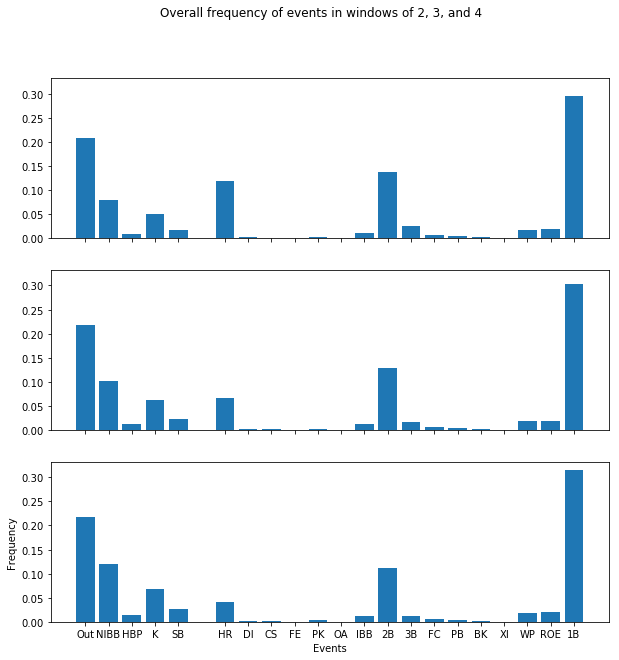

In [6]:
fig, ax = plt.subplots(3, 1, figsize=(10,10), sharey=True, sharex=True)
ax[0].bar(list(eventFreq2.keys()), list(eventNameFreq2.values()), align='center')
ax[1].bar(list(eventFreq3.keys()), list(eventNameFreq3.values()), align='center')
ax[2].bar(list(eventFreq4.keys()), list(eventNameFreq4.values()), align='center')

plt.xticks(list(eventFreq2.keys()), list(eventNameFreq2.keys()))
plt.xlabel("Events")
plt.ylabel("Frequency")
fig.suptitle("Overall frequency of events in windows of 2, 3, and 4")
plt.show()

Next, we can look at the order specific frequencies. By this, we mean looking at the counts of, say, a 1B in either the first, second, third, or fourth slot of a window of events. We do this because in a certain sense, order matters. 

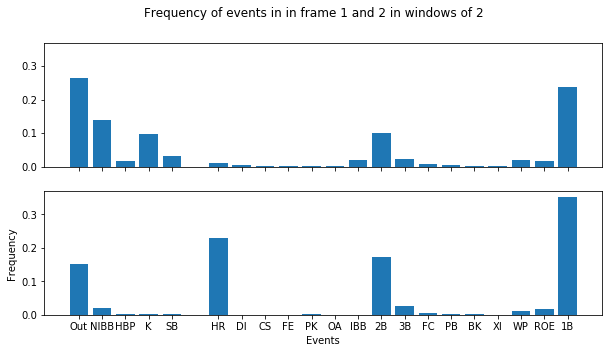

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(10,5), sharey=True, sharex=True)
ax[0].bar(list(eventFreq2_1.keys()), list(eventNameFreq2_1.values()), align='center')
ax[1].bar(list(eventFreq2_2.keys()), list(eventNameFreq2_2.values()), align='center')

plt.xticks(list(eventFreq2_1.keys()), list(eventNameFreq2_1.keys()))
plt.xlabel("Events")
plt.ylabel("Frequency")
fig.suptitle("Frequency of events in in frame 1 and 2 in windows of 2")
plt.show()

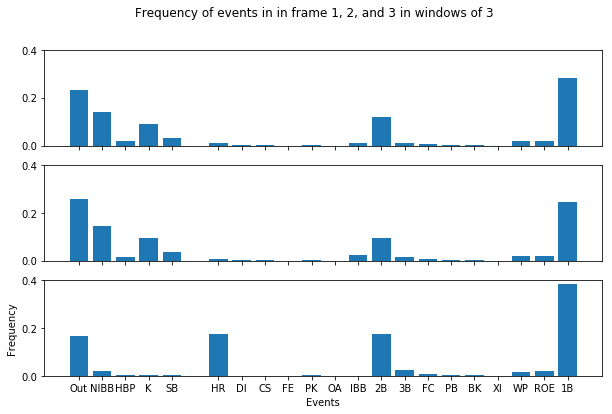

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(10,6), sharey=True, sharex=True)
ax[0].bar(list(eventFreq3_1.keys()), list(eventNameFreq3_1.values()), align='center')
ax[1].bar(list(eventFreq3_2.keys()), list(eventNameFreq3_2.values()), align='center')
ax[2].bar(list(eventFreq3_3.keys()), list(eventNameFreq3_3.values()), align='center')

plt.xticks(list(eventFreq3_1.keys()), list(eventNameFreq3_1.keys()))
plt.xlabel("Events")
plt.ylabel("Frequency")
fig.suptitle("Frequency of events in in frame 1, 2, and 3 in windows of 3")
plt.show()

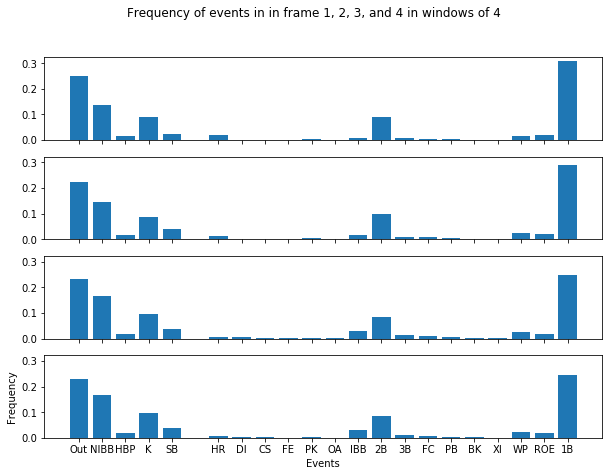

In [9]:
fig, ax = plt.subplots(4, 1, figsize=(10,7), sharey=True, sharex=True)
ax[0].bar(list(eventFreq4_1.keys()), list(eventNameFreq4_1.values()), align='center')
ax[1].bar(list(eventFreq4_2.keys()), list(eventNameFreq4_2.values()), align='center')
ax[2].bar(list(eventFreq4_3.keys()), list(eventNameFreq4_3.values()), align='center')
ax[3].bar(list(eventFreq4_3.keys()), list(eventNameFreq4_3.values()), align='center')

plt.xticks(list(eventFreq4_1.keys()), list(eventNameFreq4_1.keys()))
plt.xlabel("Events")
plt.ylabel("Frequency")
fig.suptitle("Frequency of events in in frame 1, 2, 3, and 4 in windows of 4")
plt.show()

# Transition Matrices
***
We can also look at transitions between events and the probability of one event transitioning to another. The colored grids show each event and the likelihood of transitioning to another. More yellow colors indicate a higher probability of transition, while darker blue colors indicate a lower likelihood. 


In [10]:
#transition matrices 

trans2_1to2 = {}

trans3_1to2 = {}
trans3_2to3 = {}

trans4_1to2 = {}
trans4_2to3 = {}
trans4_3to4 = {}

#for counting of unique sequences
hashable2Seqs = {}
hashable3Seqs = {}
hashable4Seqs = {}

for i in range(2, 24):
    trans2_1to2[i] = {}

    trans3_1to2[i] = {}
    trans3_2to3[i] = {}

    trans4_1to2[i] = {}
    trans4_2to3[i] = {}
    trans4_3to4[i] = {}

#count transitions
for v in range(0, total2):
    e1 = events2DF['event_cd'][v]
    e2 = events2DF['eventCD2'][v]
    trans2_1to2[e1][e2] = trans2_1to2[e1].get(e2, 0) + 1
    hashable2Seqs[str(e1) + "_" + str(e2)] = hashable2Seqs.get(str(e1) + "_" + str(e2), 0) + 1
    
for v in range(0, total3):
    e1 = events3DF['event_cd'][v]
    e2 = events3DF['eventCD2'][v]
    e3 = events3DF['eventCD3'][v]
    trans3_1to2[e1][e2] = trans3_1to2[e1].get(e2, 0) + 1
    trans3_2to3[e2][e3] = trans3_2to3[e2].get(e3, 0) + 1
    hashable3Seqs[str(e1) + "_" + str(e2) + "_" + str(e3)] = hashable3Seqs.get(str(e1) + "_" + str(e2) + "_" + str(e3), 0) + 1
    
for v in range(0, total4):
    e1 = events4DF['event_cd'][v]
    e2 = events4DF['eventCD2'][v]
    e3 = events4DF['eventCD3'][v]
    e4 = events4DF['eventCD4'][v]
    trans4_1to2[e1][e2] = trans4_1to2[e1].get(e2, 0) + 1
    trans4_2to3[e2][e3] = trans4_2to3[e2].get(e3, 0) + 1
    trans4_3to4[e3][e4] = trans4_3to4[e3].get(e4, 0) + 1
    hashable4Seqs[str(e1) + "_" + str(e2) + "_" + str(e3) +"_" + str(e4)] = hashable4Seqs.get(str(e1) + "_" + str(e2) + "_" + str(e3) + "_" + str(e4), 0) + 1

    
#normalize 
for k in range(2, 24):
    total = 0
    for k2 in trans2_1to2[k].keys():
        total += trans2_1to2[k][k2]
    for k2 in trans2_1to2[k].keys():
        trans2_1to2[k][k2] = round(float(trans2_1to2[k][k2])/ float(total), 5)
        
    total = 0
    for k2 in trans3_1to2[k].keys():
        total += trans3_1to2[k][k2]
    for k2 in trans3_1to2[k].keys():
        trans3_1to2[k][k2] = round(float(trans3_1to2[k][k2])/ float(total), 5)
    total = 0
    for k2 in trans3_2to3[k].keys():
        total += trans3_2to3[k][k2]
    for k2 in trans3_2to3[k].keys():
        trans3_2to3[k][k2] = round(float(trans3_2to3[k][k2])/ float(total), 5)
        
    total = 0
    for k2 in trans4_1to2[k].keys():
        total += trans4_1to2[k][k2]
    for k2 in trans4_1to2[k].keys():
        trans4_1to2[k][k2] = round(float(trans4_1to2[k][k2])/ float(total), 5)
    total = 0
    for k2 in trans4_2to3[k].keys():
        total += trans4_2to3[k][k2]
    for k2 in trans4_2to3[k].keys():
        trans4_2to3[k][k2] = round(float(trans4_2to3[k][k2])/ float(total), 5)
    total = 0
    for k2 in trans4_3to4[k].keys():
        total += trans4_3to4[k][k2]
    for k2 in trans4_3to4[k].keys():
        trans4_3to4[k][k2] = round(float(trans4_3to4[k][k2])/ float(total), 5)

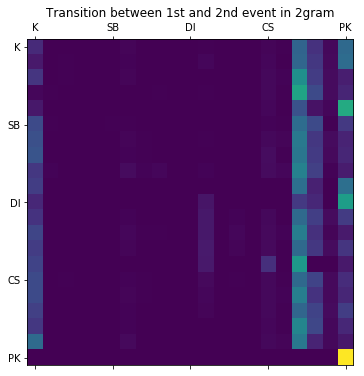

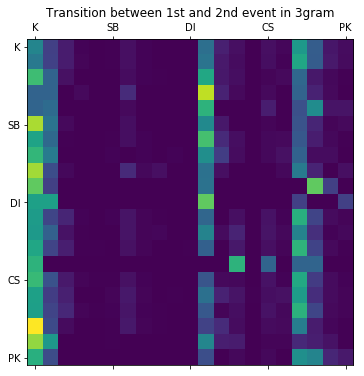

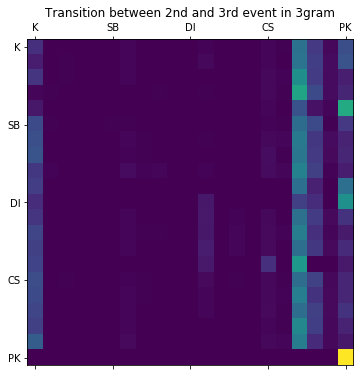

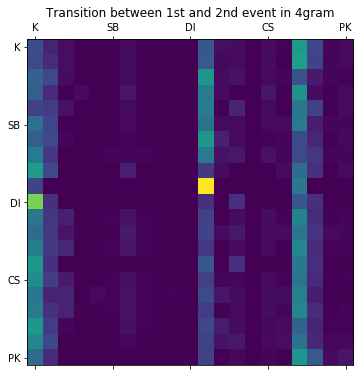

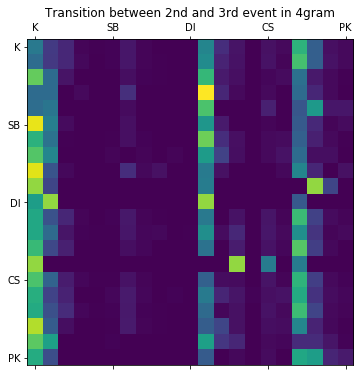

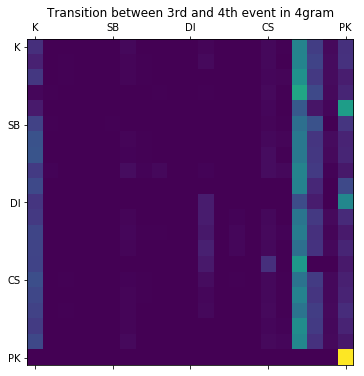

In [11]:
allMyTransMatrices = [trans2_1to2, trans3_1to2, trans3_2to3, trans4_1to2, trans4_2to3, trans4_3to4]
titles = ["Transition between 1st and 2nd event in 2gram","Transition between 1st and 2nd event in 3gram",
         "Transition between 2nd and 3rd event in 3gram", "Transition between 1st and 2nd event in 4gram",
         "Transition between 2nd and 3rd event in 4gram", "Transition between 3rd and 4th event in 4gram"]

titleCt=0 

for d in allMyTransMatrices:
    
    myMtx = np.zeros((len(eventCodes), len(eventCodes)))
    for i in range(0, len(eventCodes)):
        for j in range(0, len(eventCodes)):
            if eventCodes[i] in d.keys():
                if eventCodes[j] in d[eventCodes[i]].keys():
                    myMtx[i, j] = d[eventCodes[i]][eventCodes[j]]
                else:
                    myMtx[i, j] = 0
            else:
                myMtx[i, j] = 0

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    ax.set_xticklabels(listOfEvents)
    ax.set_yticklabels(listOfEvents)
    ax.xaxis.set_major_locator(tk.MultipleLocator(1))
    ax.yaxis.set_major_locator(tk.MultipleLocator(1))
    
    #plt.xticks(range(len(listOfEvents)), listOfEvents)
    plt.title(titles[titleCt])
    
    ax.matshow(myMtx)
    plt.show()
    titleCt += 1

# Sequences
***
Now we look at sequence frequencies. What are the most recurring sequences?  

We start with the top 10 sequences of 2 events

In [12]:
#top sequences 

#newA = dict(sorted(A.iteritems(), key=operator.itemgetter(1), reverse=True)[:5])

topSeqsOf2 = dict(sorted(hashable2Seqs.items(), key=operator.itemgetter(1), reverse=True)[:10])
topSeqsOf3 = dict(sorted(hashable3Seqs.items(), key=operator.itemgetter(1), reverse=True)[:10])
topSeqsOf4 = dict(sorted(hashable4Seqs.items(), key=operator.itemgetter(1), reverse=True)[:10])

#print(topSeqsOf2, topSeqsOf3, topSeqsOf4)

for event in topSeqsOf2.keys(): 
    isoEvent = event.split("_")
    print(eventCodesDictReversedFull[int(isoEvent[0])][1], ",", eventCodesDictReversedFull[int(isoEvent[1])][1])
    print("Count", topSeqsOf2[event])
    print("Percentage", round(float(topSeqsOf2[event])/float(total2),5)*100, "% \n")


Out , Single
Count 5297
Percentage 8.579 % 

Single , Single
Count 4847
Percentage 7.85 % 

Out , Homerun
Count 5584
Percentage 9.044 % 

Single , Out
Count 2803
Percentage 4.54 % 

Strikeout , Homerun
Count 2145
Percentage 3.474 % 

Nonintentional Walk , Single
Count 2954
Percentage 4.784 % 

Out , Double
Count 2354
Percentage 3.8129999999999997 % 

Double , Single
Count 2825
Percentage 4.575 % 

Single , Double
Count 2965
Percentage 4.802 % 

Single , Homerun
Count 2646
Percentage 4.2860000000000005 % 



The top 10 sequences of 3 events

In [13]:
for event in topSeqsOf3.keys(): 
    isoEvent = event.split("_")
    print(eventCodesDictReversedFull[int(isoEvent[0])][1], ",", eventCodesDictReversedFull[int(isoEvent[1])][1], ",", eventCodesDictReversedFull[int(isoEvent[2])][1],)
    print("Count", topSeqsOf3[event])
    print("Percentage", round(float(topSeqsOf3[event])/float(total3),5)*100, "% \n")

Single , Out , Double
Count 802
Percentage 1.455 % 

Single , Single , Out
Count 1012
Percentage 1.836 % 

Nonintentional Walk , Single , Single
Count 848
Percentage 1.539 % 

Out , Double , Single
Count 896
Percentage 1.6260000000000001 % 

Out , Single , Double
Count 807
Percentage 1.464 % 

Double , Out , Single
Count 1160
Percentage 2.105 % 

Single , Out , Single
Count 1494
Percentage 2.711 % 

Out , Out , Homerun
Count 1298
Percentage 2.355 % 

Single , Single , Single
Count 1860
Percentage 3.375 % 

Out , Single , Single
Count 874
Percentage 1.5859999999999999 % 



The top 10 sequences of 4 events

In [14]:
for event in topSeqsOf4.keys(): 
    isoEvent = event.split("_")
    print(eventCodesDictReversedFull[int(isoEvent[0])][1], ",", eventCodesDictReversedFull[int(isoEvent[1])][1], ",", eventCodesDictReversedFull[int(isoEvent[2])][1], ",",  eventCodesDictReversedFull[int(isoEvent[3])][1])
    print("Count", topSeqsOf4[event])
    print("Percentage", round(float(topSeqsOf4[event])/float(total4),5)*100, "% \n")

Out , Nonintentional Walk , Single , Single
Count 291
Percentage 0.674 % 

Single , Out , Out , Single
Count 352
Percentage 0.815 % 

Single , Single , Out , Out
Count 289
Percentage 0.6689999999999999 % 

Single , Single , Single , Single
Count 340
Percentage 0.787 % 

Out , Single , Out , Single
Count 246
Percentage 0.5700000000000001 % 

Single , Single , Single , Out
Count 244
Percentage 0.565 % 

Out , Double , Out , Single
Count 256
Percentage 0.5930000000000001 % 

Out , Single , Single , Single
Count 577
Percentage 1.336 % 

Single , Single , Out , Single
Count 559
Percentage 1.294 % 

Single , Out , Single , Single
Count 404
Percentage 0.936 % 



# Comparing ROC with RC and OBP
***

Looking at the histograms, runs created and all ROC stats appear to have exponential distributions. This could indicate that they are similar and correlated. OBP is a bit unusually shaped. 

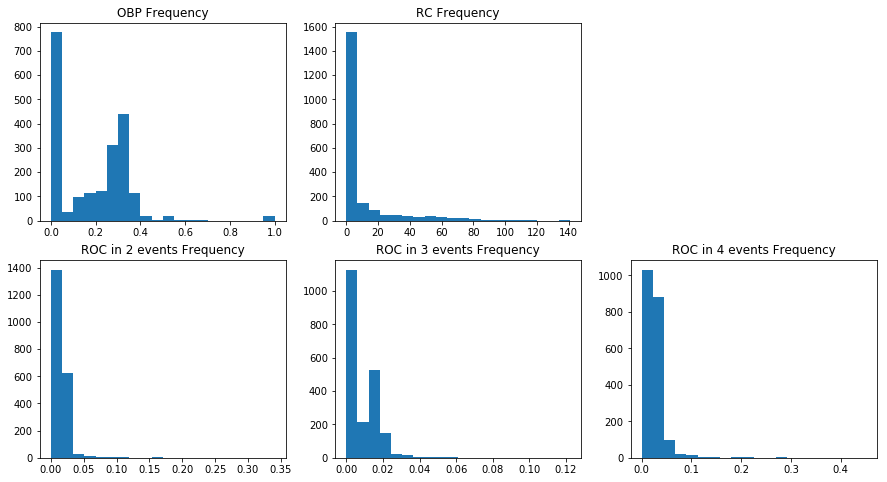

In [35]:
#player scores data 
statsDF = pd.read_csv('allStats.csv')

#distribution of OBP, RC, and all ROC scores 
binSize = 20
plt.figure(figsize=(15,8))
plt.subplot(2, 3, 1)
plt.hist(statsDF['OBP'], bins=binSize)
plt.title("OBP Frequency")
plt.subplot(2, 3, 2)
plt.hist(statsDF['RC'], bins=binSize)
plt.title("RC Frequency")
plt.subplot(2, 3, 4)
plt.hist(statsDF['2ROC'], bins=binSize)
plt.title("ROC in 2 events Frequency")
plt.subplot(2, 3, 5)
plt.hist(statsDF['3ROC'], bins=binSize)
plt.title("ROC in 3 events Frequency")
plt.subplot(2, 3, 6)
plt.hist(statsDF['4ROC'], bins=binSize)
plt.title("ROC in 4 events Frequency")
plt.show()

# Correlation 

We can also observe each point of data compared to one another in order to visualize the relationships.

Correlation between RC and 3ROC : 0.403546299905


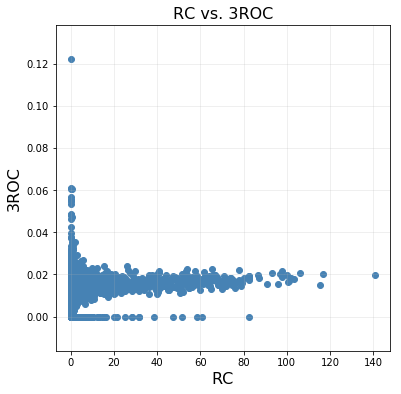

In [45]:
#correlation or ROCs with RC, OBP 
choice1 = 'RC'
choice2 = '3ROC'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
axes.scatter(statsDF[choice1], statsDF[choice2], color = "steelblue")
axes.grid(alpha=0.25)
axes.set_xlabel(choice1, fontsize=16)
axes.set_ylabel(choice2, fontsize=16)
axes.set_title(choice1+ " vs. " + choice2, fontsize=16)

c = statsDF[choice1].corr(statsDF[choice2], method='pearson')
print("Correlation between", choice1, "and", choice2, ":" ,c)

Full correlation table:

In [37]:
statsDF.drop(['firstName', 'lastName'], axis=1).corr(method='pearson')

,RC,OBP,2ROC,3ROC,4ROC
RC,1.000000,0.444398,0.220340,0.403546,0.189753
OBP,0.444398,1.000000,0.239780,0.424737,0.360810
2ROC,0.220340,0.239780,1.000000,0.379400,0.650344
3ROC,0.403546,0.424737,0.379400,1.000000,0.399572
4ROC,0.189753,0.360810,0.650344,0.399572,1.000000


# Looking at unique sequences 
***
We can look at sequences of our design here. Inputting each event will show the percentage frequency of that event in that order of the sequence, as well as the probability of transitioning between each one. Finally, we can see the probability of observing the sequence as a whole. 

Please input on of the following codes :

Out -- Generic Out

K -- Strikeout

SB -- Stolen Base

DI -- Defensive Indifference

CS -- Caught Stealing

PK --Pickoff

WP -- Wild Pitch

PB --Passed Ball

BK -- Balk

OA -- Other Advance

FE -- Foul Error

NIBB -- Nonintentional walk

IBB -- Intentional walk

HBP -- Hit by pitch

XI -- Interference

ROE -- Error

FC -- Fielder Choice

1B -- Single

2B -- Double

3B -- Triple

HR -- Homerun

In [46]:
inputSeqs = input("Enter codes, seperated by a comma (no spaces), then press enter: ")
inputSeqs = inputSeqs.split(",")

Enter codes, seperated by a comma (no spaces), then press enter: Out,K,1B


In [48]:
n = len(inputSeqs)

if n > 4:
    print("Error. Too many arguments")
    
inputSeqsCd = []
for s in inputSeqs:
    if (s != "Out"):
        s = s.upper()
    s = s.strip(" ")
    if s in eventCodesDict.keys():
        inputSeqsCd.append(eventCodesDict[s])
    else:
        print("Error. Input invalid:", s, " is not a valid code")


print("Frequencies of")
if n == 2: 
    print(str(inputSeqs[0]), ":", float(eventFreq2_1[inputSeqsCd[0]]) / float(total2))
    print(str(inputSeqs[1]), ":", float(eventFreq2_2[inputSeqsCd[1]]) / float(total2))
elif n == 3: 
    print(str(inputSeqs[0]), ":", float(eventFreq3_1[inputSeqsCd[0]]) / float(total3))
    print(str(inputSeqs[1]), ":", float(eventFreq3_2[inputSeqsCd[1]]) / float(total3))
    print(str(inputSeqs[2]), ":", float(eventFreq3_3[inputSeqsCd[2]]) / float(total3))
elif n == 4: 
    print(str(inputSeqs[0]), ":", float(eventFreq4_1[inputSeqsCd[0]]) / float(total4))
    print(str(inputSeqs[1]), ":", float(eventFreq4_2[inputSeqsCd[1]]) / float(total4))
    print(str(inputSeqs[2]), ":", float(eventFreq4_3[inputSeqsCd[2]]) / float(total4))
    print(str(inputSeqs[3]), ":", float(eventFreq4_4[inputSeqsCd[3]]) / float(total4))
print("\n")

print("Probability of transitioning from ")
if n == 2: 
    if inputSeqsCd[0] in trans2_1to2.keys() and inputSeqsCd[1] in trans2_1to2[inputSeqsCd[0]].keys():
        print(str(inputSeqs[0]), "to", str(inputSeqs[1]), ":", trans2_1to2[inputSeqsCd[0]][inputSeqsCd[1]])
    else:
        print(str(inputSeqs[0]), "to", str(inputSeqs[1]), ": 0")
        
    s = str(inputSeqsCd[0]) + "_" + str(inputSeqsCd[1]) 
    print("\n")
    print("Probability of seeing this sequence [result in a run]")
    if s in hashable2Seqs.keys():
        print(round(float(hashable2Seqs[s])/float(total2),5), "%")
    else:
        print("0%")
if n == 3: 
    if inputSeqsCd[0] in trans3_1to2.keys() and inputSeqsCd[1] in trans3_1to2[inputSeqsCd[0]].keys():
        print(str(inputSeqs[0]), "to", str(inputSeqs[1]), ":", trans3_1to2[inputSeqsCd[0]][inputSeqsCd[1]])
    else:
        print(str(inputSeqs[0]), "to", str(inputSeqs[1]), ": 0")
    
    if inputSeqsCd[1] in trans3_2to3.keys() and inputSeqsCd[2] in trans3_2to3[inputSeqsCd[1]].keys():
        print(str(inputSeqs[1]), "to", str(inputSeqs[2]), ":", trans3_2to3[inputSeqsCd[1]][inputSeqsCd[2]])
    else:
        print(str(inputSeqs[1]), "to", str(inputSeqs[2]), ": 0")

    s = str(inputSeqsCd[0]) + "_" + str(inputSeqsCd[1]) + "_" +str(inputSeqsCd[2]) 
    print("\n")
    print("Probability of seeing this sequence [result in a run]")
    if s in hashable3Seqs.keys():
        print(round(float(hashable3Seqs[s])/float(total3),5), "%")
    else:
        print("0%")
elif n == 4:
    if inputSeqsCd[0] in trans4_1to2.keys() and inputSeqsCd[1] in trans4_1to2[inputSeqsCd[0]].keys():
        print(str(inputSeqs[0]), "to", str(inputSeqs[1]), ":", trans4_1to2[inputSeqsCd[0]][inputSeqsCd[1]])
    else:
        print(str(inputSeqs[0]), "to", str(inputSeqs[1]), ": 0")
        
    if inputSeqsCd[1] in trans4_2to3.keys() and inputSeqsCd[2] in trans4_2to3[inputSeqsCd[1]].keys():
        print(str(inputSeqs[1]), "to", str(inputSeqs[2]), ":", trans4_2to3[inputSeqsCd[1]][inputSeqsCd[2]])
    else:
        print(str(inputSeqs[1]), "to", str(inputSeqs[2]), ": 0")    
        
    if inputSeqsCd[2] in trans4_3to4.keys() and inputSeqsCd[3] in trans4_3to4[inputSeqsCd[2]].keys():
        print(str(inputSeqs[2]), "to", str(inputSeqs[3]), ":", trans4_3to4[inputSeqsCd[2]][inputSeqsCd[3]])
    else:
        print(str(inputSeqs[2]), "to", str(inputSeqs[3]), ": 0") 

    s = str(inputSeqsCd[0]) + "_" + str(inputSeqsCd[1]) + "_" +str(inputSeqsCd[2]) + "_" + str(inputSeqsCd[3]) 
    print("\n")
    print("Probability of seeing this sequence [result in a run]")
    if s in hashable4Seqs.keys():
        print(round(float(hashable4Seqs[s])/float(total4),5) * 100, "%")
    else:
        print("0%")

Frequencies of
Out : 0.23299103741064625
K : 0.09557676258209659
1B : 0.3816176203780979


Probability of transitioning from 
Out to K : 0.08316
K to 1B : 0.3806


Probability of seeing this sequence [result in a run]
0.00561 %


# Looking At Player Stats 
***
We can also input a player (between 2010 and 2013) to see what their scores would be for RC (run created), OBP (on base percentage), and each Ngram of ROC. 

Please check allStats.csv for a full list of available names.

In [43]:
inputName  = input("Enter player name, then press enter: ")

Enter player name, then press enter: Brad Peacock


In [44]:
playerNames = []
for line in range(0,len(statsDF)):
    name = str(statsDF['firstName'][line]) + " " + str(statsDF['lastName'][line])
    playerNames.append(name)
    
if inputName not in playerNames:
    print("Invalid name. Check allStats.csv for valid names" )
    
#player = "Patrick Corbin"

else: 
    player = inputName.split()

    first = player[0]
    last= player[1]

    for line in range(0,len(statsDF)):
        if statsDF['firstName'][line] == first and statsDF['lastName'][line] == last:
            print(statsDF['firstName'][line], statsDF['lastName'][line])
            print("Runs created: ", statsDF['RC'][line])
            print("OBP: ", statsDF['OBP'][line])
            print("Run Opportunities created in 2 events: ", statsDF['2ROC'][line])
            print("Run Opportunities created in 3 events: ",statsDF['3ROC'][line])
            print("Run Opportunities created in 4 events: ",statsDF['4ROC'][line])

Brad Peacock
Runs created:  0.0
OBP:  0.0
Run Opportunities created in 2 events:  0.028724
Run Opportunities created in 3 events:  0.122224
Run Opportunities created in 4 events:  0.060246
